In [13]:
import numpy as np
from glob import glob
from typing import List
from fnmatch import fnmatch
import matplotlib.pyplot as plt
import os

In [22]:
#root_path = r'D:\sd_dynObj'
file_pattern = '*_grid.npz'
root_path = r'D:\npz_files\scenario3'
_MAX_LENGTH =25


def get_all_bag_paths(root:str,pattern:str)->List[str]:
    list_all_bags=[]
    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                list_all_bags.append((os.path.join(path, name)))

    return list_all_bags

In [23]:

all_grid_paths=get_all_bag_paths(root_path,pattern=file_pattern)
all_init_paths = get_all_bag_paths(root_path,pattern="*_init_path.npz")
all_opt_paths = get_all_bag_paths(root_path,pattern="*_opt_path.npz")
len(all_opt_paths)

11

## Check data imbalance- optimized paths vs non optimized paths

In [29]:
def check_imbalance(init_path_arr,opt_path_arr):
    count=0
    zero_paths = 0
    indices = []
    assert len(opt_path_arr)==len(init_path_arr)
    for i in range(len(init_path_arr)):
        if np.array_equal(init_path_arr[i],opt_path_arr[i]):
            count +=1
        if not np.array_equal(init_path_arr[i],opt_path_arr[i]):
            indices.append(i)
        
            
    if len(init_path_arr)>0:
        print(f"Paths that are not optimized: {count}, which is {count/len(init_path_arr)*100:.2f} % of total data")
        print(f"Paths that are optimized: {(len(init_path_arr)-count)}, which is {((len(init_path_arr)-count)/len(init_path_arr))*100:.2f} % of total data")
        print(f"Zero paths : {zero_paths}")
        print(f"Unequal path indixes:{indices}\n")
    return count,len(init_path_arr)

#check_imbalance(init,opt)

In [30]:
acc_count =0
acc_total_samples =0
for i in range(len(all_grid_paths)):
    #arr=np.load(all_grid_paths[i])
    init = np.load(all_init_paths[i])
    opt = np.load(all_opt_paths[i])
    bag_name = (all_grid_paths[i].split('\\')[-1])
    folder_name = (all_grid_paths[i].split('\\')[-2])
    scene_name = (all_grid_paths[i].split('\\')[-3])
    print(f"Bag Name: {os.path.join(scene_name,folder_name,bag_name)} -->")
    cnt,samples=check_imbalance(init["init_path"],opt["opt_path"])
    acc_count+=cnt
    acc_total_samples+=samples
    

Bag Name: scenario3\2021-06-10_11-12-21\2021-06-10_11-12-22_0_nos96_grid.npz -->
Paths that are not optimized: 86, which is 89.58 % of total data
Paths that are optimized: 10, which is 10.42 % of total data
Zero paths : 0
Unequal path indixes:[0, 15, 16, 44, 45, 46, 47, 58, 66, 87]

Bag Name: scenario3\2021-06-10_11-12-21\2021-06-10_11-13-23_1_nos188_grid.npz -->
Paths that are not optimized: 183, which is 97.34 % of total data
Paths that are optimized: 5, which is 2.66 % of total data
Zero paths : 0
Unequal path indixes:[34, 56, 85, 115, 144]

Bag Name: scenario3\2021-06-10_11-15-33\2021-06-10_11-15-34_0_nos173_grid.npz -->
Paths that are not optimized: 160, which is 92.49 % of total data
Paths that are optimized: 13, which is 7.51 % of total data
Zero paths : 0
Unequal path indixes:[0, 37, 38, 39, 40, 58, 69, 71, 72, 105, 106, 107, 129]

Bag Name: scenario3\2021-06-10_11-15-33\2021-06-10_11-16-34_1_nos65_grid.npz -->
Paths that are not optimized: 62, which is 95.38 % of total data
Pa

In [20]:
print(f"Total paths {acc_total_samples}, cases with optimized paths {acc_total_samples-acc_count}")

Total paths 1458, cases with optimized paths 144


## check memory occupied by grid after loading

In [7]:
data_sample_idx = 55
import time
from sys import getsizeof
start = time.time()

np_grid = np.load(all_grid_paths[data_sample_idx])
print(np.shape(np_grid["grid_data"]))

print("Time taken to load grid data:", time.time()-start)

np.save("test",np_grid["grid_data"])

sizeodgrid=np_grid["grid_data"]
print(getsizeof(sizeodgrid)/1024)

(176, 1536, 1536)
Time taken to load grid data: 4.025906324386597
1622016.125


In [8]:
import tensorflow as tf
int_grid = (np_grid["grid_data"]/127).astype(np.int8)
sp_t = tf.sparse.from_dense(np_grid["grid_data"])

print(getsizeof(int_grid)/1024)
print(getsizeof(sp_t)/1024)

405504.125
0.0546875


## visualize grids and paths

TypeError: not all arguments converted during string formatting

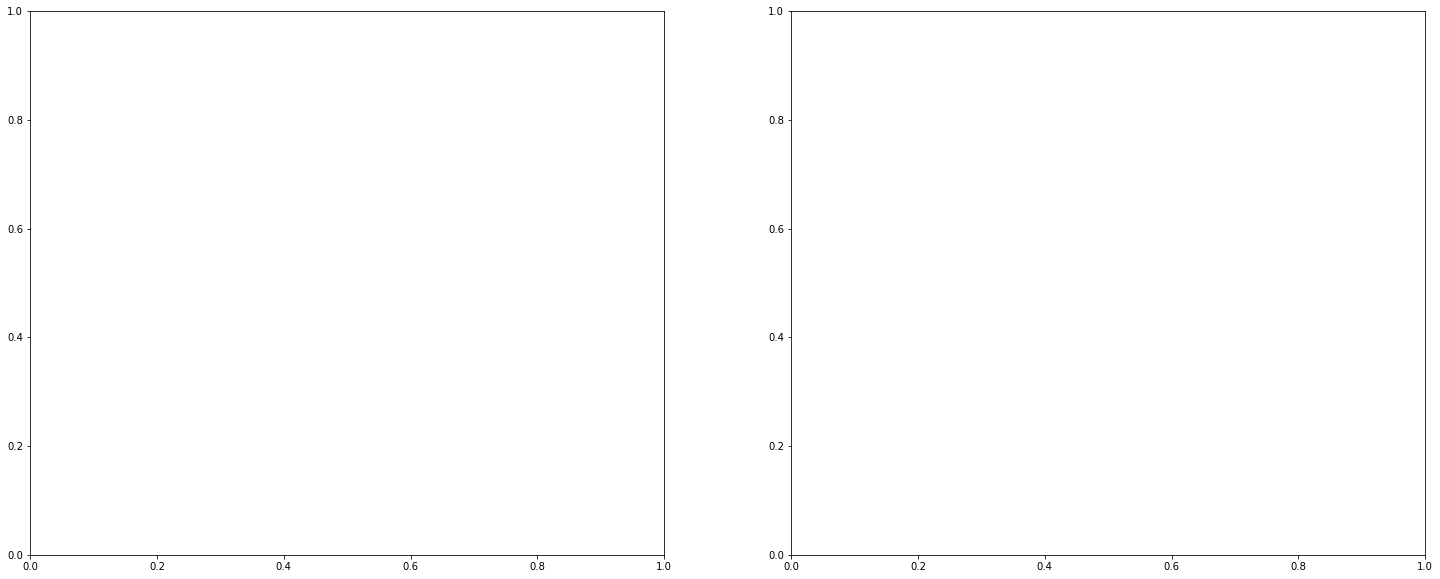

In [7]:
test_idx=10
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
#plt.imshow(np_grid["grid_data"][test_idx])
plt.subplot(1,2,2)
plt.plot(init[test_idx,:,0],init[test_idx,:,1],'o-', color='red')
plt.plot(opt[test_idx,:,0],opt[test_idx,:,1],'o-', color='blue')

In [8]:
#test_idx=38
plt.plot(init[test_idx,:,0],init[test_idx,:,1],'o-', color='red')
plt.plot(opt[test_idx,:,0],opt[test_idx,:,1],'o-', color='blue')

TypeError: not all arguments converted during string formatting